In [2]:
import wrapper
import tensorflow as tf
from tensorflow.core.example import example_pb2
import io
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np
import ray
import ray_util

In [3]:
ray.init()

Waiting for redis server at 127.0.0.1:42877 to respond...
Waiting for redis server at 127.0.0.1:59408 to respond...
Starting local scheduler with the following resources: {'GPU': 0, 'CPU': 16}.

View the web UI at http://localhost:8889/notebooks/ray_ui86695.ipynb?token=727fd874820b1d825a0e12db77cef9653cc4a15759b63b3a



{'local_scheduler_socket_names': ['/tmp/scheduler96074115'],
 'node_ip_address': '127.0.0.1',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store8172762', manager_name='/tmp/plasma_manager56445796', manager_port=32660)],
 'redis_address': '127.0.0.1:42877',
 'webui_url': 'http://localhost:8889/notebooks/ray_ui86695.ipynb?token=727fd874820b1d825a0e12db77cef9653cc4a15759b63b3a'}

In [4]:
a = wrapper.Wrapper.remote("discrete_tcnn1", 
            "data/discrete_tcnn1/model.ckpt-126001.bestmodel",
            20)

In [5]:
example = example_pb2.Example()
in_file = "/home/ubuntu/samples-1k/tfrecords/08022699-d03af7f6.tfrecords"

count = 0
for example_serialized in tf.python_io.tf_record_iterator(in_file):
    example.ParseFromString(example_serialized)
    feature_map = example.features.feature
    encoded = feature_map['image/encoded'].bytes_list.value
    print(count)
    count += 1

0


[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]


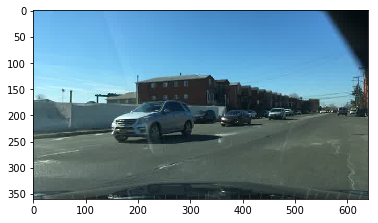

In [6]:
file_jpgdata = io.BytesIO(encoded[0])
dt = Image.open(file_jpgdata)
imshow(np.asarray(dt))
print(ray.get(a.observe_a_frame.remote(np.asarray(dt))))

In [ ]:
for i in range(len(encoded)):
    if i % 5 == 0:
        file_jpgdata = io.BytesIO(encoded[0])
        dt = Image.open(file_jpgdata)
        arr = np.asarray(dt)
        out = ray.get(a.observe_a_frame.remote(arr))
        print(out)
        print(i/5)

[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
0.0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
1.0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
2.0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
3.0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
4.0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
5.0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
6.0
